In [2]:
import random
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

Формирование DataFrame и именование колонок (1, 2 пункт)

In [3]:
df = pd.read_csv('paths.csv', delimiter=',', usecols = (0, 2), names = ('AbsPath', 'Name'))

In [4]:
df.head()

,AbsPath,Name
0,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard
1,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard
2,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard
3,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard
4,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard


3 пункт, столбец класса

In [5]:
df['Class'] = df['Name'].apply(lambda name: 0 if name == 'leopard' else 1)

In [6]:
df.head()

,AbsPath,Name,Class
0,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0
1,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0
2,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0
3,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0
4,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0


Столбцы характеризующие изображения (4 пункт)

In [7]:
df['Height'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[0])

In [8]:
df['Width'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[1])

In [9]:
df['Channel'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[2])

In [10]:
df.head()

,AbsPath,Name,Class,Height,Width,Channel
0,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,1600,2560,3
1,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,928,1400,3
2,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,1200,1920,3
3,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,2592,3888,3
4,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,1414,2121,3


Статическая информация (5 пункт)

In [11]:
df[df['Class'] == 0]['Height'].describe()

count      32.000000
mean     1593.906250
std       651.133669
min       750.000000
25%      1200.000000
50%      1333.000000
75%      1940.000000
max      3326.000000
Name: Height, dtype: float64

In [12]:
df[df['Class'] == 1]['Height'].describe()

count      40.000000
mean     1379.375000
std       593.544101
min       666.000000
25%      1050.000000
50%      1302.500000
75%      1464.000000
max      3481.000000
Name: Height, dtype: float64

In [13]:
df[df['Class'] == 0]['Width'].describe()

count      32.000000
mean     2291.687500
std      1011.986594
min       938.000000
25%      1600.750000
50%      1925.000000
75%      2616.750000
max      4810.000000
Name: Width, dtype: float64

In [14]:
df[df['Class'] == 1]['Width'].describe()

count      40.000000
mean     2040.350000
std       990.919918
min       736.000000
25%      1470.000000
50%      1920.000000
75%      2468.500000
max      5221.000000
Name: Width, dtype: float64

In [15]:
df[df['Class'] == 0]['Channel'].describe()

count    32.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: Channel, dtype: float64

In [16]:
df[df['Class'] == 1]['Channel'].describe()

count    40.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: Channel, dtype: float64

Фильтрация по DataFrame(6 пункт)

In [17]:
def split_class(data: pd.DataFrame, class_name: int) -> pd.DataFrame:

    new_data = data[data['Class'] == class_name]
    new_data.reset_index(drop=True, inplace=True)
    return new_data

In [18]:
df_0 = split_class(df, 0) 
df_1 = split_class(df, 1)

In [19]:
df_1['Class'].unique()

array([1], dtype=int64)

Фильтрация (7 пункт)

In [20]:
def split_shape(data: pd.DataFrame, class_name: int, max_height: int, max_width: int) -> pd.DataFrame:

    new_data = data[(data['Class'] == class_name) & (data['Height'] <= max_height) & (data['Width'] <= max_width)]
    new_data.reset_index(drop=True, inplace=True)
    return new_data

In [21]:
df_0_filter = split_shape(df, 0, 1100, 1400)

In [22]:
df_0_filter['Width'].max()

1400

Группировка DF(8 пункт)

In [23]:
df['Pixels'] = df['Height'] * df['Width'] * df['Channel']

In [24]:
df.head()

,AbsPath,Name,Class,Height,Width,Channel,Pixels
0,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,1600,2560,3,12288000
1,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,928,1400,3,3897600
2,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,1200,1920,3,6912000
3,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,2592,3888,3,30233088
4,C:\Users\tihoo\Desktop\Study\Programming\pytho...,leopard,0,1414,2121,3,8997282


In [25]:
for class_name, sub_df in df.groupby("Class"):
    print(f'Class: {class_name}')
    print(f'Max: {sub_df.Pixels.max()}')
    print(f'Min: {sub_df.Pixels.min()}')
    print(f'Mean: {round(sub_df.Pixels.mean(), 2)}')
    print('-----------------------------')


Class: 0
Max: 47994180
Min: 2110500
Mean: 12693439.31
-----------------------------
Class: 1
Max: 54522903
Min: 1998000
Mean: 10057173.98
-----------------------------


гистограмма(9 пункт)

In [33]:
def get_gists(data: pd.DataFrame, class_name: int) -> (List[np.ndarray], np.ndarray):

    class_data = split_class(data, class_name)
    image = cv2.imread(class_data['AbsPath'][random.randint(0, len(class_data) - 1)])
    hists = []
    for i in range(1 if len(image.shape) == 2 else image.shape[2]):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hists.append(hist)
    return hists, image

Графики и оси гистограммы(10 пункт)

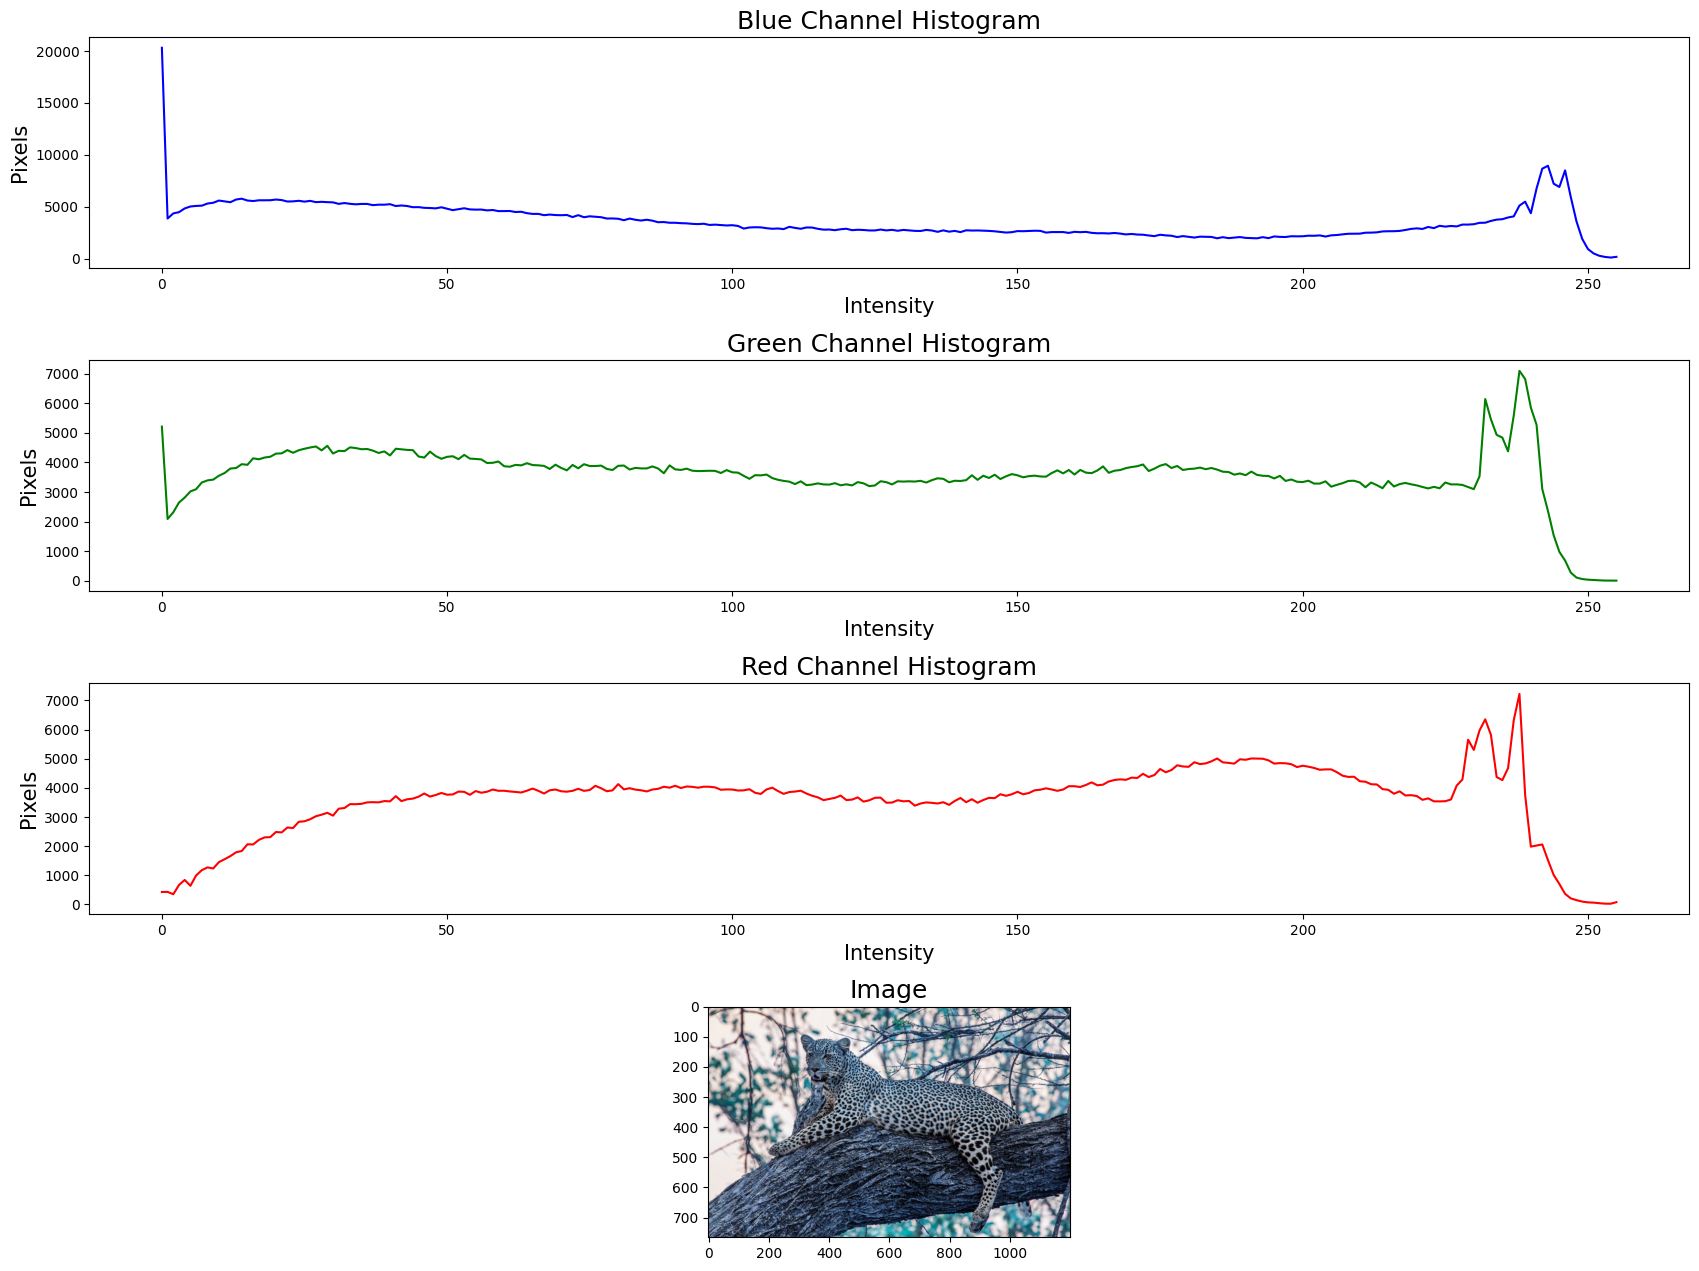

In [35]:
hists, image = get_gists(df, 0)

fig = plt.figure(figsize=(20, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

fig.add_subplot(4, 1, 3)
plt.title('Red Channel Histogram', fontsize = 18)
plt.plot(hists[2], color = 'r')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(4, 1, 2)
plt.title('Green Channel Histogram', fontsize = 18)
plt.plot(hists[1], color = 'g')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(4, 1, 1)
plt.title('Blue Channel Histogram', fontsize = 18)
plt.plot(hists[0], color = 'b')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(4, 1, 4)
plt.title('Image',  fontsize = 18)
plt.imshow(image)

plt.show()